Acerca del conjunto de datos:

El departamento de recursos humanos de una empresa desea predecir si algunos empleados abandonarán la empresa en los próximos 2 años.

https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction?datasetId=1642869

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
empleados = pd.read_csv('Employee.csv')
empleados.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


#### Descripción de variables: 

- Education(Educación): ['Bachelors', 'Masters', 'PHD']

- JoinYear(Año de incorporación/Contratación)

- City (Ciudad) :  ['Bangalore', 'Pune', 'New Delhi']

- PaymentTier [1 : Alto , 2 : Medio , 3: Bajo]: Nivel de ingreso

- Age(Edad)

- Gender(Genero): ['Male', 'Female']

- EverBenched() : ['No', 'Yes'] -> Alguna vez se mantuvo fuera de los proyectos por 1 mes o más.

- ExperienceInCurrentDomain(Experiencia en el campo actual) [0 .. 7]

- LeaveOrNot: [0, 1] Tiene pensado dejar la empresa en los proximos 2 años.

##### Tipos de datos de las variables

In [4]:
empleados.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

##### Información mas detallada del dataset y sus datos

In [9]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


##### Corroboramos que no haya datos nulos.

In [10]:
empleados.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Trazamos histogramas de variables numéricas, para entender cómo se distribuyen en el conjunto de datos. 

Esto puede ayudarnos a identificar sesgos o patrones interesantes.

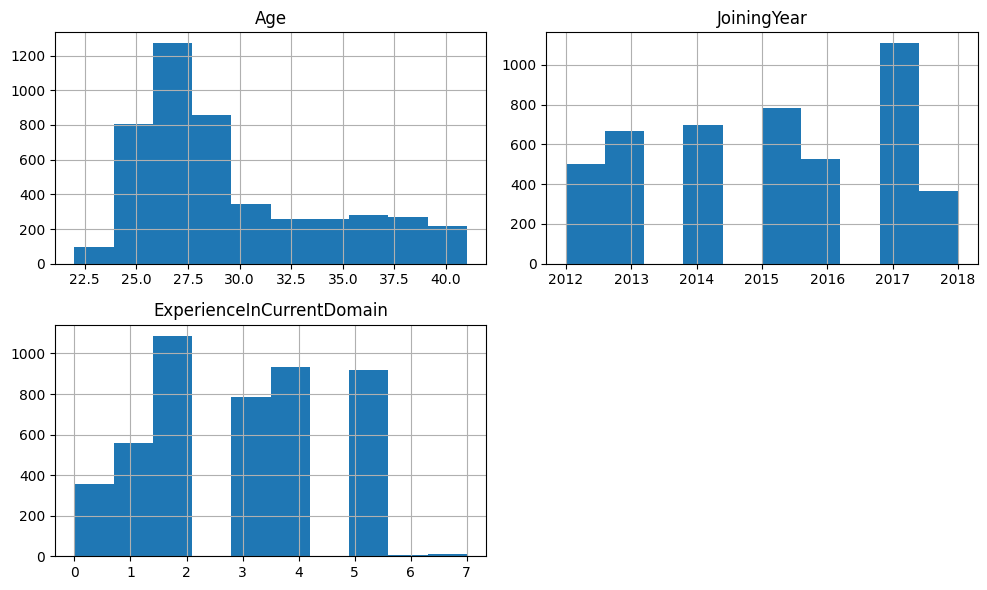

In [11]:
empleados[['Age', 'JoiningYear', 'ExperienceInCurrentDomain']].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

Damos a la variable 'PaymentTier' valores más entendibles. 

In [13]:
empleados["PaymentTier"].replace({1:"Alto",2:"Medio",3:"Bajo"},inplace=True)
empleados["PaymentTier"].unique()

array(['Bajo', 'Alto', 'Medio'], dtype=object)

Calculamos la cantidad de empleados por ciudad.

In [14]:
empleados_por_ciudad = empleados['City'].value_counts()
empleados_por_ciudad

City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64

Calculamos la cantidad de empleados por género.

In [15]:
empleados_por_genero = empleados['Gender'].value_counts()
empleados_por_genero

Gender
Male      2778
Female    1875
Name: count, dtype: int64

Calculamos la cantidad de empleados por nivel de ingreso.

In [16]:
cantidad_empleados_por_nivel_ingreso = empleados.groupby('PaymentTier')['Age'].count()
print(cantidad_empleados_por_nivel_ingreso)

PaymentTier
Alto      243
Bajo     3492
Medio     918
Name: Age, dtype: int64


Distribución de empleados por nivel educativo

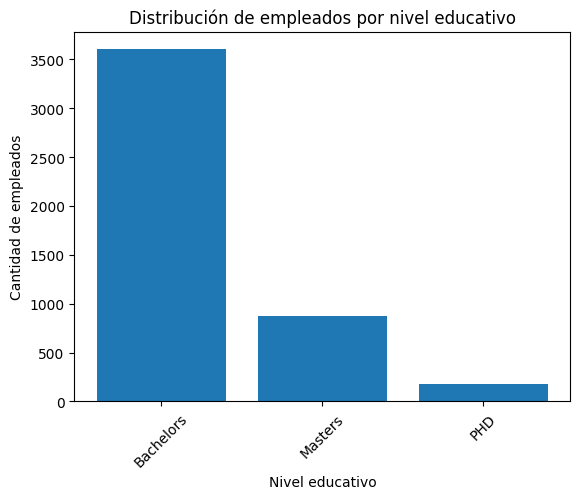

In [17]:
educacion_counts = empleados['Education'].value_counts()

plt.bar(educacion_counts.index, educacion_counts.values)
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad de empleados')
plt.title('Distribución de empleados por nivel educativo')
plt.xticks(rotation=45)
plt.show()

 Proporción de empleados que planean dejar la empresa en los próximos 2 años según el género.

In [18]:
tasa_rotacion_por_genero = empleados.groupby('Gender')['LeaveOrNot'].mean()
print(tasa_rotacion_por_genero)

Gender
Female    0.471467
Male      0.257739
Name: LeaveOrNot, dtype: float64


Proporción de empleados que alguna vez se mantuvieron fuera de proyectos por 1 mes o más.

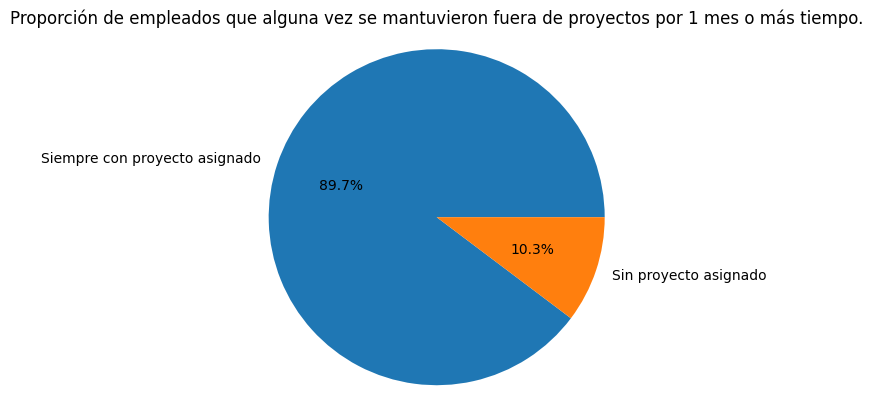

In [11]:
event_benched_counts = empleados['EverBenched'].value_counts()
labels = ['Siempre con proyecto asignado', 'Sin proyecto asignado']
plt.pie(event_benched_counts, labels=labels, autopct='%1.1f%%')
plt.title('Proporción de empleados que alguna vez se mantuvieron fuera de proyectos por 1 mes o más tiempo.')
plt.axis('equal')
plt.show()

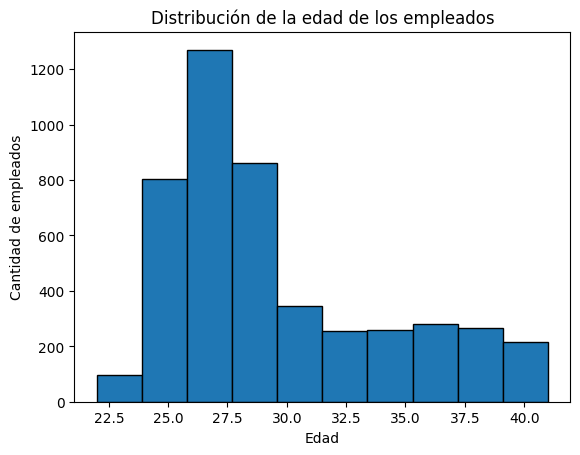

In [21]:
plt.hist(empleados['Age'], bins=10, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Cantidad de empleados')
plt.title('Distribución de la edad de los empleados')
plt.show()

Nivel de ingreso promedio de los empleados por género y nivel educativo

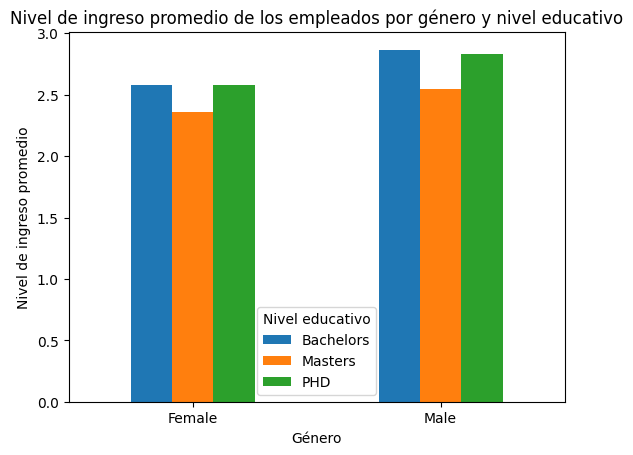

In [5]:
empleados = pd.read_csv('Employee.csv')
nivel_ingreso_genero_educacion = empleados.groupby(['Gender', 'Education'])['PaymentTier'].mean().unstack()

nivel_ingreso_genero_educacion.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Nivel de ingreso promedio')
plt.title('Nivel de ingreso promedio de los empleados por género y nivel educativo')
plt.legend(title='Nivel educativo')
plt.xticks(rotation=0)
plt.show()